In [10]:
from __future__ import absolute_import, division, print_function, unicode_literals

import sys
!{sys.executable} -m pip install git+https://github.com/nottombrown/imagenet_stubs
sys.path.append("..")

%matplotlib inline

import imagenet_stubs
import numpy as np
import keras
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras.layers import Dense, Flatten
from keras.models import Model
import keras.backend as k
from matplotlib import pyplot as plt
from IPython.display import clear_output
import tensorflow as tf
from art.estimators.classification import KerasClassifier
from art.attacks.evasion import HopSkipJump
from art.utils import to_categorical

  Cloning https://github.com/nottombrown/imagenet_stubs to /private/var/folders/02/4nnzxw916092rdqf0k4_n_r40000gn/T/pip-req-build-ais_b5lv
  Running command git clone -q https://github.com/nottombrown/imagenet_stubs /private/var/folders/02/4nnzxw916092rdqf0k4_n_r40000gn/T/pip-req-build-ais_b5lv
  Created wheel for imagenet-stubs: filename=imagenet_stubs-0.0.7-py3-none-any.whl size=794838 sha256=3de227038b529290bfe581c41cb0937d40273a1679248de418eaf8b2e9f7d4d1
  Stored in directory: /private/var/folders/02/4nnzxw916092rdqf0k4_n_r40000gn/T/pip-ephem-wheel-cache-9kc9gpno/wheels/33/0f/5a/c83688c23a05eb9e88527a8944da56dbe007c86f534b0c1dad
Successfully built imagenet-stubs


In [2]:
tf.compat.v1.disable_eager_execution()

In [3]:
mean_imagenet = np.zeros([224, 224, 3])
mean_imagenet[...,0].fill(103.939)
mean_imagenet[...,1].fill(116.779)
mean_imagenet[...,2].fill(123.68)
model = ResNet50(weights='imagenet')
classifier = KerasClassifier(clip_values=(0, 255), model=model, preprocessing=(mean_imagenet, 1))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


I think this is a: Persian_cat
Target image is:  283


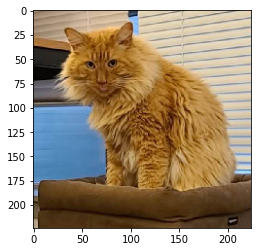

I think this is a: Eskimo_dog
Init image is:  248


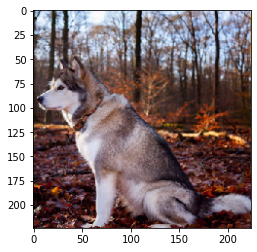

In [43]:
target_image_name = 'simba3.jpg'
init_image_name = 'malamute.jpg'
for image_path in imagenet_stubs.get_image_paths():
    if image_path.endswith(target_image_name):
        target_image = image.load_img(image_path, target_size=(224, 224))
        target_image = image.img_to_array(target_image)
    if image_path.endswith(init_image_name):
        init_image = image.load_img(image_path, target_size=(224, 224))
        init_image = image.img_to_array(init_image)

pred = classifier.predict(np.array([target_image]))
print('I think this is a:', decode_predictions(pred, top=2)[0][0][1])

print("Target image is: ", np.argmax(pred))
plt.imshow(target_image.astype(np.uint))
plt.show()

pred = classifier.predict(np.array([init_image]))
print('I think this is a:', decode_predictions(pred, top=2)[0][0][1])

print("Init image is: ", np.argmax(pred))
plt.imshow(init_image.astype(np.uint))
plt.show()

HopSkipJump: 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]


Adversarial image at step 0. L2 error 13646.216 and class label 611.
I think this is a: jigsaw_puzzle


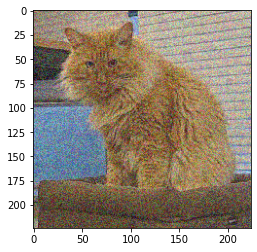

HopSkipJump: 100%|██████████| 1/1 [00:12<00:00, 12.47s/it]


Adversarial image at step 5. L2 error 9680.119 and class label 611.
I think this is a: jigsaw_puzzle


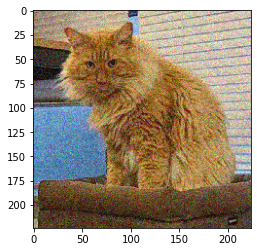

HopSkipJump: 100%|██████████| 1/1 [00:16<00:00, 16.64s/it]


Adversarial image at step 10. L2 error 6980.659 and class label 611.
I think this is a: jigsaw_puzzle


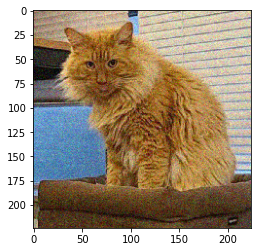

HopSkipJump: 100%|██████████| 1/1 [00:19<00:00, 19.96s/it]


Adversarial image at step 15. L2 error 3492.4805 and class label 287.
I think this is a: lynx


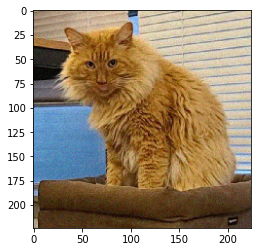

HopSkipJump: 100%|██████████| 1/1 [00:22<00:00, 22.59s/it]


Adversarial image at step 20. L2 error 2048.1323 and class label 287.
I think this is a: lynx


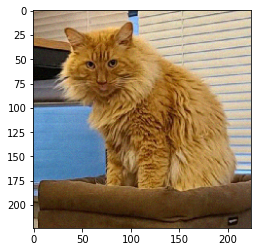

HopSkipJump: 100%|██████████| 1/1 [00:25<00:00, 25.09s/it]


Adversarial image at step 25. L2 error 1522.977 and class label 287.
I think this is a: lynx


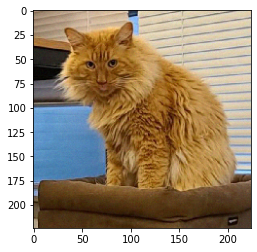

In [39]:
#create attack using adversarial toolkit
attack = HopSkipJump(classifier=classifier, targeted=False, max_iter=0, max_eval=1000, init_eval=10)

iter_step = 5

x_adv = None

for i in range(6):
    
    x_adv = attack.generate(x=np.array([target_image]), x_adv_init=x_adv, resume=True)

    #clear_output()
    pred = classifier.predict(x_adv)
    print("Adversarial image at step %d." % (i * iter_step), "L2 error", 
          np.linalg.norm(np.reshape(x_adv[0] - target_image, [-1])),
          "and class label %d." % np.argmax(pred[0]))
    print('I think this is a:', decode_predictions(pred, top=1)[0][0][1])
    plt.imshow(x_adv[0].astype(np.uint))
    plt.show(block=False)
    
    attack.max_iter = iter_step

HopSkipJump: 100%|██████████| 1/1 [00:00<00:00, 1424.70it/s]

248
initial_prediction:  Eskimo_dog


Adversarial image at step 0. L2 error 33053.035 and class label 248.
I think this is a:  Eskimo_dog


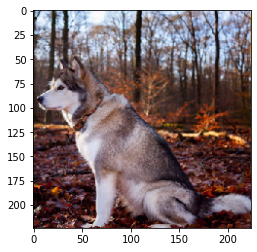

HopSkipJump: 100%|██████████| 1/1 [00:30<00:00, 30.29s/it]


Adversarial image at step 10. L2 error 18926.062 and class label 248.
I think this is a:  Eskimo_dog


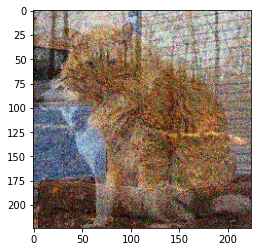

HopSkipJump: 100%|██████████| 1/1 [00:43<00:00, 43.34s/it]


Adversarial image at step 20. L2 error 16761.316 and class label 248.
I think this is a:  Eskimo_dog


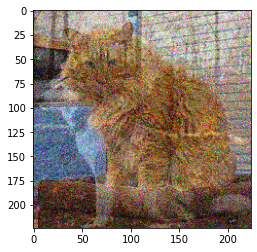

HopSkipJump: 100%|██████████| 1/1 [00:51<00:00, 51.38s/it]


Adversarial image at step 30. L2 error 15561.338 and class label 248.
I think this is a:  Eskimo_dog


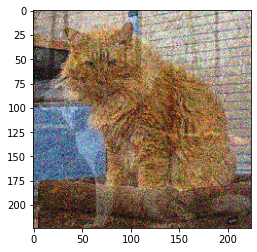

HopSkipJump: 100%|██████████| 1/1 [00:59<00:00, 59.47s/it]


Adversarial image at step 40. L2 error 14355.495 and class label 248.
I think this is a:  Eskimo_dog


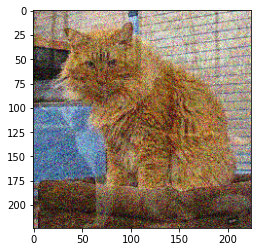

HopSkipJump: 100%|██████████| 1/1 [01:05<00:00, 65.88s/it]


Adversarial image at step 50. L2 error 12705.475 and class label 248.
I think this is a:  Eskimo_dog


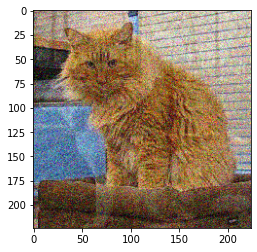

HopSkipJump: 100%|██████████| 1/1 [01:11<00:00, 71.40s/it]


Adversarial image at step 60. L2 error 11519.353 and class label 248.
I think this is a:  Eskimo_dog


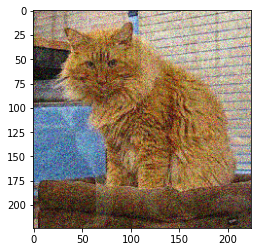

HopSkipJump: 100%|██████████| 1/1 [01:14<00:00, 74.68s/it]


Adversarial image at step 70. L2 error 10236.975 and class label 248.
I think this is a:  Eskimo_dog


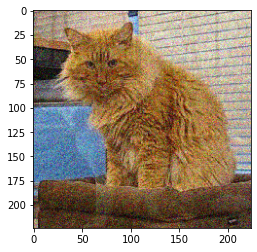

HopSkipJump: 100%|██████████| 1/1 [01:23<00:00, 83.36s/it]


Adversarial image at step 80. L2 error 8997.439 and class label 248.
I think this is a:  Eskimo_dog


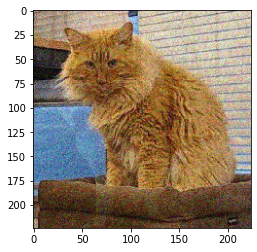

HopSkipJump: 100%|██████████| 1/1 [01:33<00:00, 93.03s/it]


Adversarial image at step 90. L2 error 7936.8555 and class label 248.
I think this is a:  Eskimo_dog


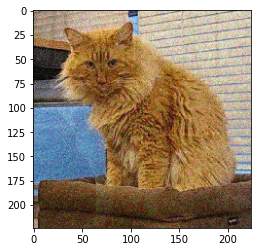

HopSkipJump: 100%|██████████| 1/1 [01:33<00:00, 93.81s/it]


Adversarial image at step 100. L2 error 7126.718 and class label 248.
I think this is a:  Eskimo_dog


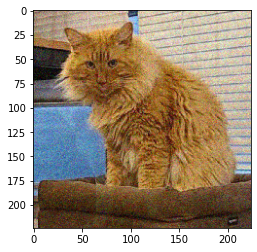

HopSkipJump: 100%|██████████| 1/1 [01:41<00:00, 101.32s/it]


Adversarial image at step 110. L2 error 6612.8086 and class label 248.
I think this is a:  Eskimo_dog


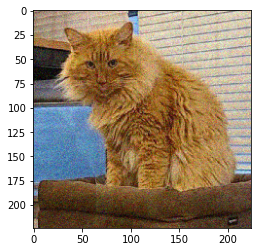

HopSkipJump: 100%|██████████| 1/1 [01:45<00:00, 105.31s/it]


Adversarial image at step 120. L2 error 5896.787 and class label 248.
I think this is a:  Eskimo_dog


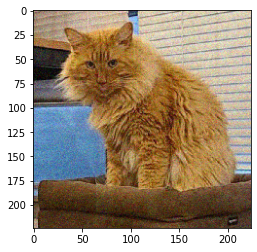

HopSkipJump: 100%|██████████| 1/1 [01:52<00:00, 112.22s/it]


Adversarial image at step 130. L2 error 5440.717 and class label 248.
I think this is a:  Eskimo_dog


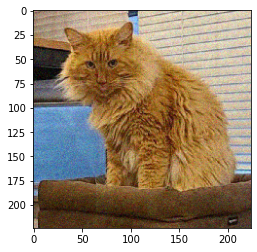

HopSkipJump: 100%|██████████| 1/1 [01:54<00:00, 114.37s/it]


Adversarial image at step 140. L2 error 5244.31 and class label 248.
I think this is a:  Eskimo_dog


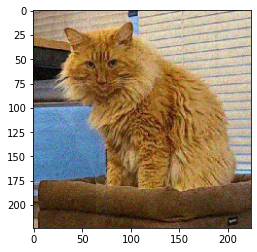

HopSkipJump: 100%|██████████| 1/1 [02:01<00:00, 121.27s/it]


Adversarial image at step 150. L2 error 4995.867 and class label 248.
I think this is a:  Eskimo_dog


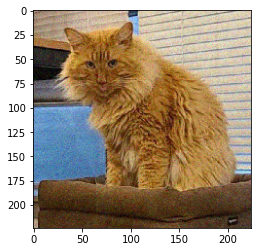

HopSkipJump: 100%|██████████| 1/1 [02:01<00:00, 121.59s/it]


Adversarial image at step 160. L2 error 4775.792 and class label 248.
I think this is a:  Eskimo_dog


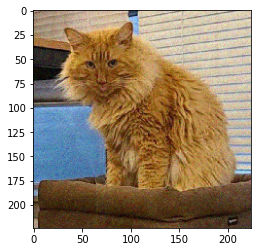

HopSkipJump: 100%|██████████| 1/1 [02:11<00:00, 131.49s/it]


Adversarial image at step 170. L2 error 4563.273 and class label 248.
I think this is a:  Eskimo_dog


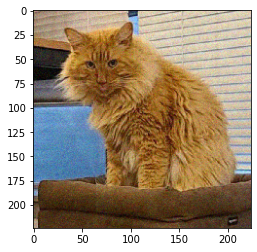

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
attack = HopSkipJump(classifier=classifier, targeted=True, max_iter=0, max_eval=1000, init_eval=10)
iter_step = 10

x_adv = np.array([init_image])

pred = classifier.predict(x_adv)

#get initial label for HopSkip to compare
initial_label = np.argmax(pred[0])

print("initial_prediction: ",decode_predictions(pred, top=1)[0][0][1])

for i in range(20):
    x_adv = attack.generate(x=np.array([target_image]), y=to_categorical([initial_label], 1000), x_adv_init=x_adv, resume=True)

    #clear_output()
    pred = classifier.predict(x_adv)
    print("Adversarial image at step %d." % (i * iter_step), "L2 error", 
          np.linalg.norm(np.reshape(x_adv[0] - target_image, [-1])),
          "and class label %d." % np.argmax(pred[0]))
    print("I think this is a: ",decode_predictions(pred, top=1)[0][0][1])
    plt.imshow(x_adv[0].astype(np.uint))
    plt.show(block=False)
    
    attack.max_iter = iter_step